Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

# Lab 3.3: Plotting

Plotting is a very useful tool for data analysis. A smart data visualization can facilitate our understanding of the data without having to parse all the data columns manually. The most relevant python libraries for plotting are **matplotlib.pyplot** and **seaborn**

['pm', 'pm', 'pm', 'pm', 'am', 'am', 'pm', 'pm', 'pm', 'am', 'am', 'pm', 'pm', 'pm', 'am', 'am', 'am', 'pm', 'pm', 'am', 'am', 'pm', 'pm', 'am', 'pm', 'pm', 'pm', 'pm', 'pm', 'am', 'pm', 'pm', 'am', 'am']


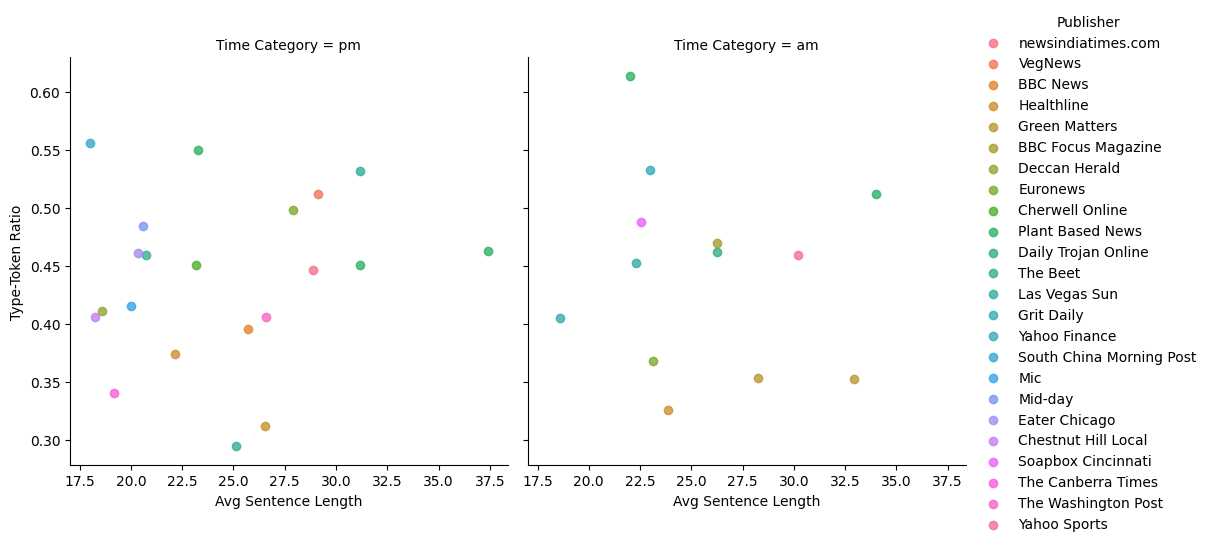

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# Read in TSV
features_file = "../data/toy_stylistic_features.csv"
stylistic_features = pd.read_csv(features_file, sep=",", keep_default_na=False, header=0)
time = ["am" if t.startswith("0") else "pm" for t in stylistic_features["Time"] ]
print(time)
stylistic_features["Time Category"] = time
sb.lmplot(stylistic_features, x="Avg Sentence Length", y="Type-Token Ratio", hue="Publisher", col="Time Category" , fit_reg=False)
plt.show()

## 1. Seaborn lmplot

The [https://seaborn.pydata.org/examples/index.html](seaborn gallery) gives you an overview of different possible plot types. "Discuss which plot types you already know and which of them are useful for language analysis."  

Below you see an example of an lmplot. It allows you to not only specify the x and the y value as in a standard scatter plot but also to compare other categories using the features hue (the color), col (the columns), and row (the rows). 

['pm', 'pm', 'pm', 'pm', 'am', 'am', 'pm', 'pm', 'pm', 'am', 'am', 'pm', 'pm', 'pm', 'am', 'am', 'am', 'pm', 'pm', 'am', 'am', 'pm', 'pm', 'am', 'pm', 'pm', 'pm', 'pm', 'pm', 'am', 'pm', 'pm', 'am', 'am']


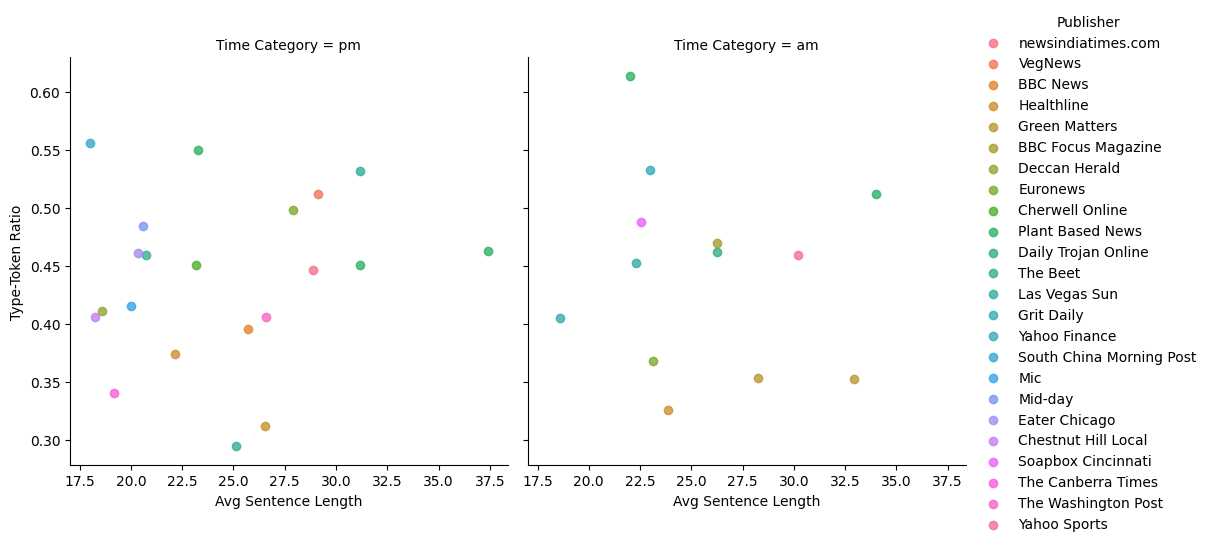

In [27]:
# We transform the time stamps into a categorical value
time = ["am" if t.startswith("0") else "pm" for t in stylistic_features["Time"] ]
print(time)
stylistic_features["Time Category"] = time


sb.lmplot(stylistic_features, x="Avg Sentence Length", y="Type-Token Ratio", hue="Publisher", col="Time Category", fit_reg = False )
plt.show()

## 2. Identifying weaknesses in pre-processing

In the code below, we want to check if stylistic features are characteristic for authors. As a by-product, we notice that the values for the author names in the dataset are extremely inconsistent: some are empty, some contain only the first name, some contain a  url. This information is extremely important and we might want to adjust the pre-processing pipeline if this information is relevant. Maybe we missed filtering out duplicates because the author names were not standardized? 

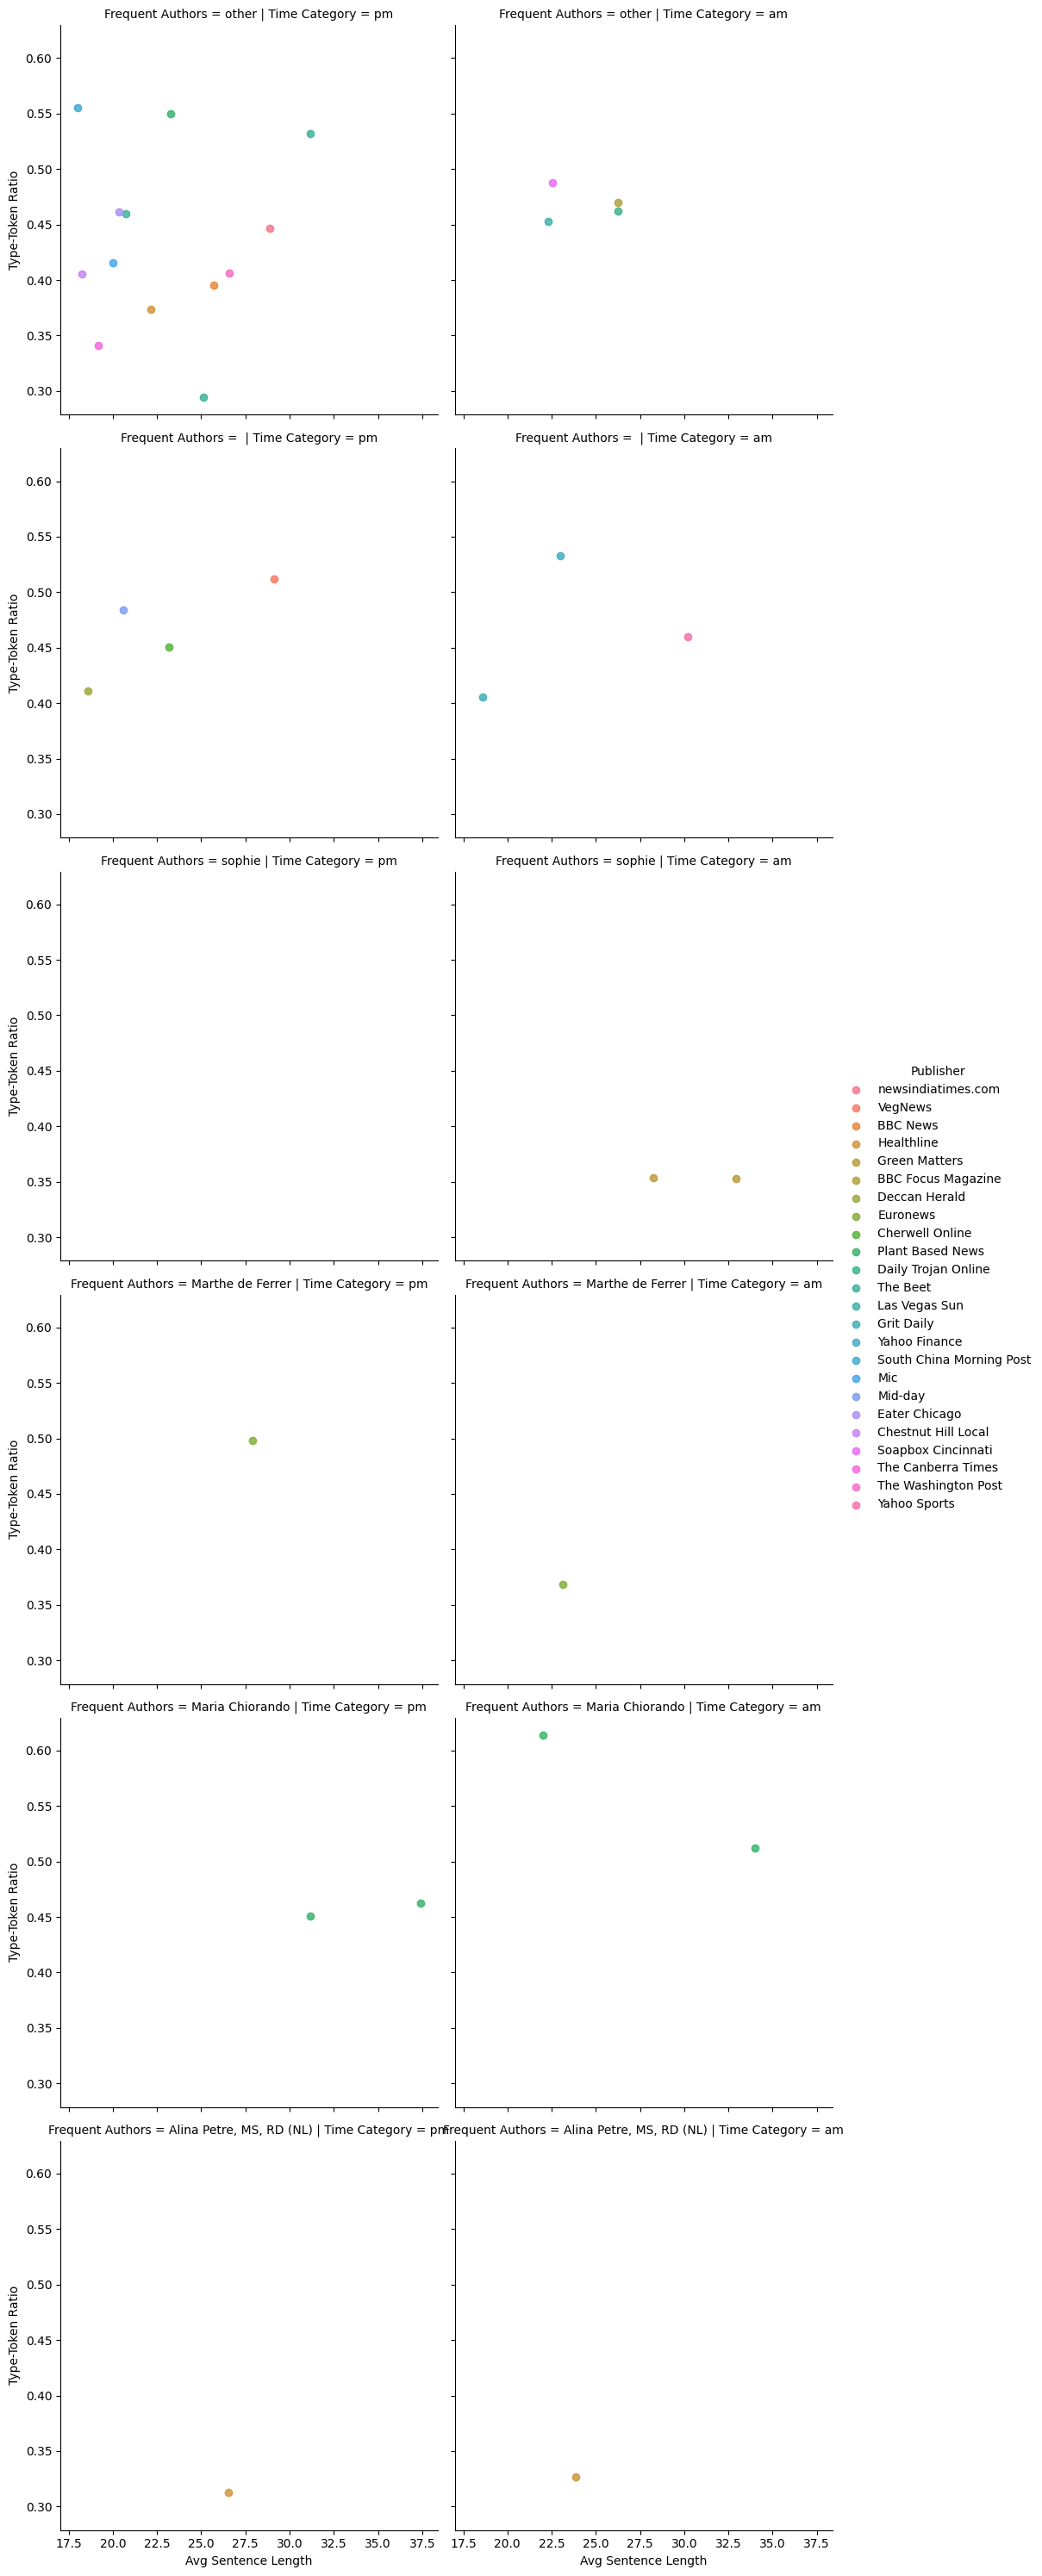

In [32]:
# Let's have a look at the authors in our dataset. 
author_counts = stylistic_features["Author"].value_counts()

# We are only interested in the ones that wrote more than one article
top_authors = [a if author_counts[a]>1 else "other" for a in stylistic_features["Author"]]
stylistic_features["Frequent Authors"] = top_authors

# Are stylistic features characteristic for authors? 
sb.lmplot(stylistic_features, x="Avg Sentence Length", y="Type-Token Ratio", hue="Publisher", col="Time Category", row = "Frequent Authors", fit_reg = False )
plt.show()


## 3. Looking at the variation

In the code above, we used the mean for the sentence length and for the concreteness values. But the mean can only provide limited information about the range of values. Let's have a closer look at the actual values. For exploration, we only use the first ten articles.  



In [76]:
import stanza
nlp = stanza.Pipeline('en', processors='tokenize')
all_sentence_lengths = []
for i, article in enumerate(stylistic_features["Text"][0:10]):
    processed = nlp(article)
    for j, sentence in enumerate(processed.sentences): 
        all_sentence_lengths.append([i, j, len(sentence.tokens)])


2023-10-25 15:27:01 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-10-25 15:27:01 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2023-10-25 15:27:01 INFO: Using device: cpu
2023-10-25 15:27:01 INFO: Loading: tokenize
2023-10-25 15:27:01 INFO: Done loading processors!


We are using a violin plot. **What does a violin plot show? How can you interpret it? **. 

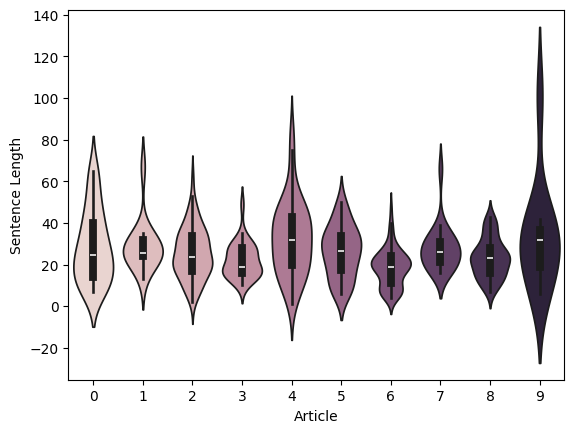

In [77]:

lengths_frame = pd.DataFrame(all_sentence_lengths, columns = ["Article", "Sentence", "Sentence Length"])

sb.violinplot(data= lengths_frame, x = "Article", y = "Sentence Length", hue = "Article", legend = False)
plt.show()

Article 4 and 9 look suspicious. Let's have a closer look with a strip plot. **What is the difference between a strip plot and a violin plot? When is it useful to display one over the other?**

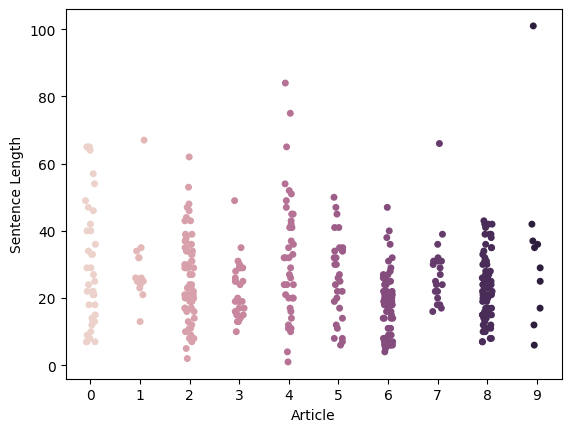

In [78]:
sb.stripplot(data= lengths_frame, x = "Article", y = "Sentence Length", hue = "Article", legend = False)
plt.show()

We can use the *"hue"* parameter to color each dot based on the position of the sentence in the article. This way, we can find out longer sentences occur more at the beginning or end of the article. 

We can use the *palette* parameter to change the color scheme for our plot. 
Note: It is useful to check how your plot looks [https://www.color-blindness.com/coblis-color-blindness-simulator/](to the colorblind eye): 

**What can we observe now (which was less obvious from the previous plot)?**

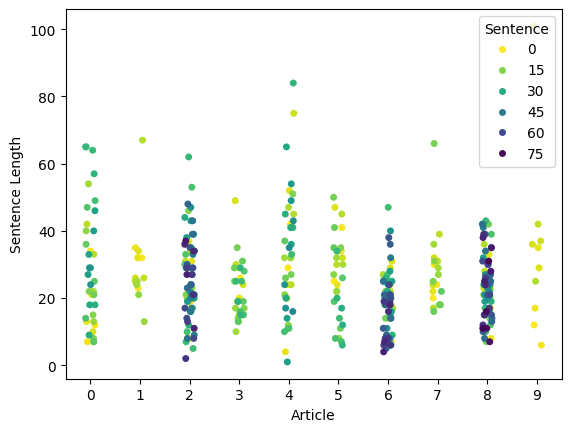

In [80]:

sb.stripplot(data= lengths_frame, x = "Article", y = "Sentence Length", hue = "Sentence", palette = "viridis_r")
plt.show()